## Assignment 2  ME 781  (Data Scale)

### Perform the following tasks in sequence:

1. Create a list of 5 open data sets available for machine learning along with their links for each of the three Data Types (Discrete data Type, Sequential (temporal) data Type and Spatial data Type)


2. Write a python code to input a dataset (csv file) of Discrete data type, automatically identify and print the

    a. Number of attributes and number of entries
    
    b. Data scale of each attribute
    
    c. Data value of each attribute


3.      Write a python code to perform statistics on each data column based on its data scale.


4.      Can we use a box plot for visualizing ordinal data? (Yes/No). Explain why. 

![MicrosoftTeams-image2.png](attachment:MicrosoftTeams-image2.png)


5.      Write a python code to visualize data in the csv file (a generalized method depending upon data scale) 

    Assignment instructions:
    1. Naming convention: Please name your colab files as rollnumber_A2.ipynb. 
    2. Learn how to use markdown to add texts in colab to make your code interactive and understandable. 
    3. After completion of your assignment download the file as .ipynb and submit itusing Teams assignment tab.

  ###  We have a software to check plagiarism in code, if anyone found copying the code, strict action will be taken against such students and can also be given FR grade directly.
    
  We  expect  you  to  upload  colab  notebooks  when  you  are  required  to  turn  your  programming assignments.  Please  make  sure  that  you  provide  enough  comments  in  the  code  for  the TAs to understand 
       

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### 1. List of 5 open data sets

In [2]:
## Paste the URLs of open datasets here and add comments describing the dataset
url1 = "https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams" # Students exam scores based on various factors
url2 = "https://www.openml.org/d/37" # Diabetes dataset
url3 = "https://www.kaggle.com/dev0914sharma/customer-clustering" # Clustering various customers based on their buying characteristics

# All the above are discrete data types

url4 =  "https://www.kaggle.com/mattiuzc/stock-exchange-data" # Stock prices - temporal data type
url5 = "https://www.kaggle.com/iamsouravbanerjee/animal-image-dataset-90-different-animals" # Classification of images using deep learning methods - spatial data type

### 2.   Write a python code to input a dataset (csv file) of Discrete datatype, automatically identify and print the

    a. Number of attributes and number of data points
    
    b. Data scale of each attribute
    
    c. Data value of each attribute

#### Note: The number of categories for categorical (nominal,ordinal) data scale for the evaluating datasets is not greater than 8.

In [3]:
# Uploading files
from google.colab import files
uploaded = files.upload()

Saving A2_example_dataset - students_demo.csv to A2_example_dataset - students_demo.csv


In [31]:
def data_description(filename, print_val = True):
    ## Write a well commented function that inputs dataset file location (.csv file) and outputs the following
    ## 1. data_scale (of length = number of attributes)
    ## 2. data_value (of length = number of attributes)
    ## 3. imported dataset for later use
    ## It should also print those details for each attribute(Output must be similar to what is mentioned below)
    
    dataset = pd.read_csv(filename)
    num_rows = len(dataset)
    num_cols = len(dataset.columns)

    
    data_scale = []
    data_value = []


    for column in dataset.columns:
      # Figure out the scale of the column first
      scale = ""
      if(type(dataset[column][0]) == type("string")):
        scale = "Nominal"
      elif(type(dataset[column][0]) == np.float64):
        scale = "Ratio"
      else:
        standard_deviation = dataset[column].std()
        range = dataset[column].max() - dataset[column].min()
        ratio = range/(3*standard_deviation)
        if ratio>0.9 and ratio<1.1:
          scale = "Ordinal"
        else:
          scale = "Ratio"
 

      # Figuring out the datatype
      data_type = ""
      if(type(dataset[column][0]) == np.float64):
        data_type = "Continuous"
      else:
        data_type = "Discrete"
      
      data_value.append(data_type)
      data_scale.append(scale)


    if(print_val):
      print("This dataset contains " + str(num_rows) + " entries, each with " + str(num_cols) + " attributes\n")
      for i, (scale, value, column) in enumerate(zip(data_scale, data_value, dataset.columns)):
        print(str(i) + " " + str(column) + ": " + str(scale) + ", " + str(value))

    return data_scale, data_value, dataset

In [32]:
data_scale, data_value, dataset = data_description("A2_example_dataset - students_demo.csv")

SyntaxError: ignored

    Output must similar to this:
    
    This dataset contains 649 entries, each with 6 attributes

    0 gender : nominal, discrete
    1 age : ratio, discrete
    2 health_rating : ordinal, discrete
    3 StudentIQ : ratio, discrete
    4 no_of_courses : ratio, discrete
    5 Marks : ratio, continuous


### 3. Write a python code to perform statistics on each data column based on its data scale.

In [33]:
def stats(filename):
    ## Write a well commented function that calls the function data_description and prints
    ## relevant statistics based on data scale.
    ## Hint: Explore describe()
    data_scale, data_value, dataset = data_description(filename, False)
    for scale, value, column in zip(data_scale, data_value, dataset.columns):
      print(column)
      if(scale == "Nominal"):
        mode = dataset[column].mode()
        print('mode : ', mode[0])
        print(dataset[column].value_counts())
        print('\n')
      elif(scale == "Ordinal"):
        mode = dataset[column].mode()
        print('mode : ', mode[0])
        median = dataset[column].median()
        print(dataset[column].value_counts())
        print('\n')
      else:
        print(dataset[column].describe())
        print('\n')
    return

In [34]:
stats("A2_example_dataset - students_demo.csv")

gender
mode :  F
F    383
M    266
Name: gender, dtype: int64


age
count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


health_rating
mode :  5
5    249
3    124
4    108
1     90
2     78
Name: health_rating, dtype: int64


StudentIQ
count    649.000000
mean     100.229584
std       10.256494
min       75.000000
25%       93.000000
50%      101.000000
75%      107.000000
max      131.000000
Name: StudentIQ, dtype: float64


no_of_courses
count    649.000000
mean      10.596302
std        5.714697
min        1.000000
25%        5.000000
50%       11.000000
75%       16.000000
max       20.000000
Name: no_of_courses, dtype: float64


Marks
count    649.000000
mean      75.137257
std       14.559722
min       50.120000
25%       62.560000
50%       75.120000
75%       87.670000
max       99.860000
Name: Marks, dtype: float64




    Output must be some what similar to this:

    gender
    mode F
    F    383
    M    266
    Name: gender, dtype: int64 

    age
    mode      17.000000
    mean      16.744222
    std        1.218138
    min       15.000000
    25%       16.000000
    median    17.000000
    75%       18.000000
    max       22.000000
    Name: age, dtype: float64 

    health_rating
    mode   5
    median 4
    1     90
    2     78
    3    124
    4    108
    5    249
    Name: health_rating, dtype: int64 

    StudentIQ
    mode     104.000000
    mean     100.229584
    std       10.256494
    min       75.000000
    25%       93.000000
    median   101.000000
    75%      107.000000
    max      131.000000
    Name: StudentIQ, dtype: float64 

    no_of_courses
    mode      17.000000
    count    649.000000
    mean      10.596302
    std        5.714697
    min        1.000000
    25%        5.000000
    median    11.000000
    75%       16.000000
    max       20.000000
    Name: no_of_courses, dtype: float64 

    Marks
    mode      52.810000
    count    649.000000
    mean      75.137257
    std       14.559722
    min       50.120000
    25%       62.560000
    median    75.120000
    75%       87.670000
    max       99.860000
    Name: Marks, dtype: float64 

### 4. Can we use a box plot for visualizing ordinal data ? (Yes/No). Explain why.
![MicrosoftTeams-image2.png](attachment:MicrosoftTeams-image2.png)

### Write your answer here. 
Yes boxplots can be used for visualiing ordinal data as boxplots are used to show the distribution of data within the 75th and 25th percentiles. Since in ordinal data, median is a valid measure, and maximum and minimum are also important, box plot can be a good choice.

###   5.  Write a python code to visualize the data (a generalized method depending on data scale) 

In [85]:
def get_data(dataset, column):
  data = dataset[column].value_counts()
  indices = data.index
  labels = []
  values = []
  for i in range(len(indices)):
    values.append(data[i])
    labels.append(indices[i])
  return [labels, values]

def visualize_data(filename):
  ## Write a well commented function that can call any of the functions from above 
  ## to plot relevant plots
  ## Hint: Use sns.distplot, sns.countplot. Make a new figure for each plot (plt.figure(i))       
  data_scale, data_value, dataset = data_description(filename, False)
  for scale, value, column in zip(data_scale, data_value, dataset.columns):
  
    if(scale == "Ordinal"):
      fig, ax = plt.subplots()
      sns.boxplot(dataset[column])
      plt.title(column)
      plt.show()

    elif(scale == "Nominal"):
      fig, ax = plt.subplots()
      palette_color = sns.color_palette('bright')
      data = np.array(dataset[column].value_counts())
      keys = dataset[column].unique()
      ax.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
      plt.title(column)
      plt.show()
      fig, ax = plt.subplots()
      ax.bar(get_data(dataset, column)[0], get_data(dataset, column)[1])
      plt.title(column)
      plt.show()

    else:
      fig, ax = plt.subplots()
      sns.histplot(dataset[column])
      plt.title(column)
      plt.show()
  return

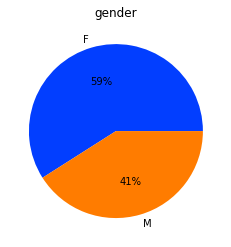

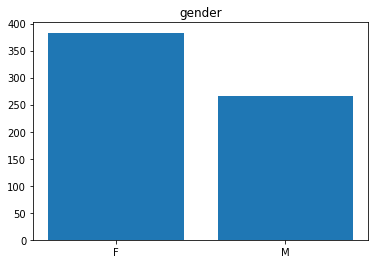

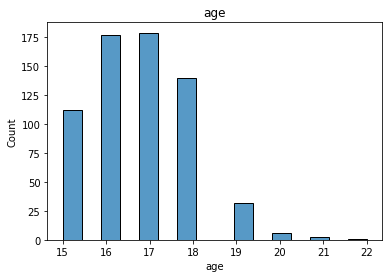

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


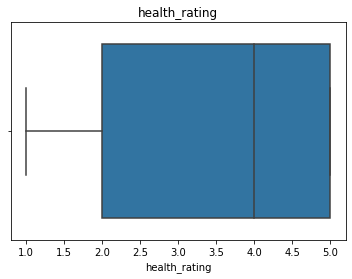

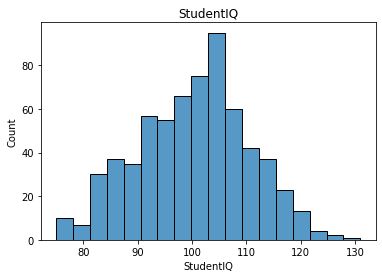

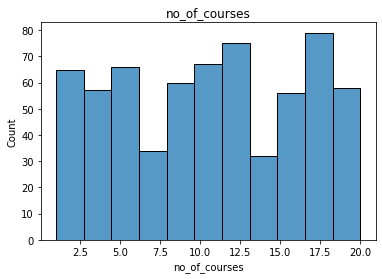

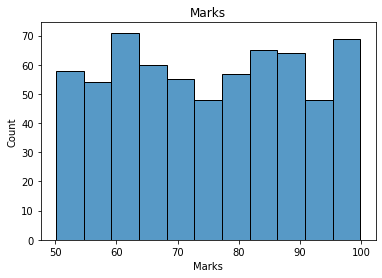

In [86]:
visualize_data("A2_example_dataset - students_demo.csv")